## Data Manipulation with Pandas
Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a DataFrame. DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data.

In [2]:
import numpy as np
import pandas as pd
pd.__version__   

'2.2.1'

### Pandas's objects

1. Pandas series
1. Pandas data frame

In [3]:
data = pd.Series([.25,.5,.75,.1])
data

0    0.25
1    0.50
2    0.75
3    0.10
dtype: float64

In [4]:
data = pd.Series(np.linspace(start=0.25,stop=1,num=4))
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [5]:
# Values an index attributes

print(f'Values: {data.values}')
print(f'Index: {data.index}')

Values: [0.25 0.5  0.75 1.  ]
Index: RangeIndex(start=0, stop=4, step=1)


In [6]:
# Accesing by index

print(data)
print(data[1])

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64
0.5


In [7]:
# Defining index

data = pd.Series(np.linspace(.25,1,4),
                 index= ['a','b','c','d'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [8]:
# Series could be thinking like as specialized dictionary

population_dic = {'California': 38332521,
                  'Texas': 26448193,
                  'New York': 19651127,
                  'Florida': 19552860,
                  'Illinois': 12882135}
population = pd.Series(population_dic)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [9]:
population['California']

38332521

In [10]:
population['California':'Illinois'] # Slicing

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [11]:
# Constructiong series objects without dictionaries

pd.Series(data = 5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

### Pandas Data Frame Object

In [12]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [13]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [14]:
# Index and columns attributes

print(f'Index attribute: {states.index} \n')
print(f'Columns attribute: {states.columns}')

Index attribute: Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object') 

Columns attribute: Index(['population', 'area'], dtype='object')


In [15]:
# Accesing by columns
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [16]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [17]:
# any list of dictionaries can be made into a DataFrame

# Exponential function

data = [{'x': i, 'exp(x)': np.exp(i)} for i in range(1,10)]
data = pd.DataFrame(data)

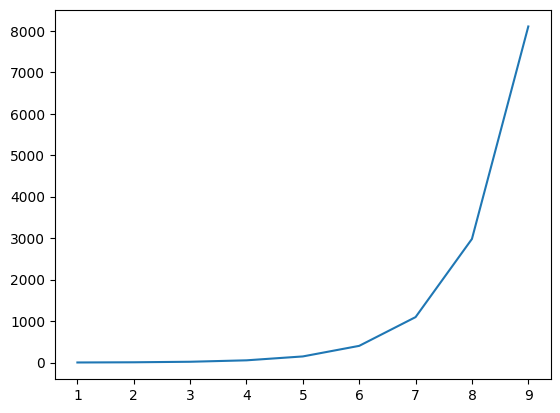

In [18]:
import matplotlib.pyplot as plt

plt.plot(data['x'], data['exp(x)'])
plt.show()

In [31]:
# Indexers: loc, iloc and ix

# We can use loc or iloc to access a different elements


data = pd.DataFrame(data= np.random.randint(low=0,high=100,size= (4,4)),
                    columns= ('One','Two','Three','Four'))

data

,One,Two,Three,Four
0,14,57,54,3
1,20,28,77,11
2,59,77,27,41
3,83,75,46,68


In [34]:
data.loc[2:, ['One', 'Four']] # (row_labels,column_labels)

,One,Four
2,59,41
3,83,68


In [55]:
data.loc[:,'Two':'Four']

,Two,Three,Four
0,57,54,3
1,28,77,11
2,77,27,41
3,75,46,68


In [36]:
data.iloc[2:, [0,3]] # (row_index,column_index)

,One,Four
2,59,41
3,83,68


In [41]:
# How access by each column

data.One is data['One']

True

In [48]:
data.columns

Index(['One', 'Two', 'Three', 'Four', 'Five'], dtype='object')

In [43]:
# We can modify our DF

data['Five'] = data.One + data.Four
data

,One,Two,Three,Four,Five
0,14,57,54,3,17
1,20,28,77,11,31
2,59,77,27,41,100
3,83,75,46,68,151


In [44]:
# Let's examine the rax underlying data array using the values attribute

data.values

array([[ 14,  57,  54,   3,  17],
       [ 20,  28,  77,  11,  31],
       [ 59,  77,  27,  41, 100],
       [ 83,  75,  46,  68, 151]])

In [45]:
# We can transpose the full DataFrame
data.T

,0,1,2,3
One,14,20,59,83
Two,57,28,77,75
Three,54,77,27,46
Four,3,11,41,68
Five,17,31,100,151


In [60]:
# Ufuncs: Operations Between DataFrame and Series

# Pandas inherits much of this functionality from numpy

A = np.random.randint(10,size=(3,4))
A

array([[7, 0, 2, 2],
       [3, 2, 0, 3],
       [2, 1, 5, 4]])

In [61]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-4,  2, -2,  1],
       [-5,  1,  3,  2]])

## Handling Missing Data


In [71]:
## Trade-Offs in Missing Data Conventions

# The dirs values used by Pandas is None

vals1 = np.array([1, None, 3, 4])
vals1.dtype #Object

dtype('O')

In [70]:
# NaN (Not a number) is more common, and is recognized like a floating-point

vals2 = np.array([1,np.nan,3,4])
vals2.dtype

dtype('float64')

In [85]:
# Detectin null values
## isnull() or notnull()

data = pd.Series([1, np.nan, 'hello', None])
print('Using isnull: \n ',data.isnull())

print('Using notnull: \n',data.notnull())

Using isnull: 
  0    False
1     True
2    False
3     True
dtype: bool
Using notnull: 
 0     True
1    False
2     True
3    False
dtype: bool


In [87]:
# Dropping null values
# method dropna()

#First way to drop null values

print(data[data.notnull()])

#Using dropna() method

data.dropna()

0        1
2    hello
dtype: object


0        1
2    hello
dtype: object

In [104]:
# Considerer the following Data Frame

df = pd.DataFrame(np.arange(1,10).reshape((3,3)))
df.iloc[0,1], df.iloc[2,0] = np.nan, np.nan
df

,0,1,2
0,1.0,NaN,3
1,4.0,5.0,6
2,NaN,8.0,9


In [106]:
# We cannot drop single values from a DF; we can only drop full rows or columns

df.dropna() # it will drop rows

# we can adjust the argument axis

df.dropna(axis='columns') # it will drop rows


,2
0,3
1,6
2,9


In [111]:
# We can adjust the parameter how which value default is how='any'

df[3] = np.nan
print(df)

df.dropna(axis= 1,how='all') #Just delete whit all np.nan


     0    1  2   3
0  1.0  NaN  3 NaN
1  4.0  5.0  6 NaN
2  NaN  8.0  9 NaN


,0,1,2
0,1.0,NaN,3
1,4.0,5.0,6
2,NaN,8.0,9


In [130]:
# Filling null values

df.fillna(0) # fill whit a value
df.fillna(method='ffill',axis=1) #forward-fill to propagate the previous value forward
df.fillna(method='bfill',axis=1) # back-fill to propagate the next values backward

https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html

C:\Users\Julian\AppData\Local\Temp\ipykernel_21700\2535431780.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',axis=1) #forward-fill to propagate the previous value forward
C:\Users\Julian\AppData\Local\Temp\ipykernel_21700\2535431780.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill',axis=1) # back-fill to propagate the next values backward


,0,1,2,3
0,1.0,3.0,3.0,NaN
1,4.0,5.0,6.0,NaN
2,8.0,8.0,9.0,NaN


In [20]:
# Multi-indexing or hierarchical indexing

index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [21]:
#Using Pandas Multi-index

index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [23]:
pop = pop.reindex(index) #Multiple index values
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [28]:
print("Show 2010's values: \n", pop[:,2010])
print("Show California's values: \n", pop['California':])

Show 2010's values: 
 California    37253956
New York      19378102
Texas         25145561
dtype: int64
Show California's values: 
 California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64


In [29]:
# Storing the same data using a simple DataFrame

pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [30]:
# Reversing the operation

pop_df.unstack()

2000  California    33871648
      New York      18976457
      Texas         20851820
2010  California    37253956
      New York      19378102
      Texas         25145561
dtype: int64

### Combining Datasets: Concat and Append

In [33]:
# Concatenation of NumPy arrays

x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [38]:
# Concatenation with pandas

df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# Concatenar por filas (axis=0)
df_concatenado = pd.concat([df1, df2], axis=0, ignore_index= True)

print(df_concatenado)

   A  B
0  1  3
1  2  4
2  5  7
3  6  8


In [41]:
# Concatenation with join

df1 = pd.DataFrame({'A': [1, 2, 3]}, index=['a', 'b', 'c'])
df2 = pd.DataFrame({'B': [4, 5, 6]}, index=['a', 'b', 'd'])

# Join per index

df_joined = df1.join(df2, how='left')

print(df_joined)

   A    B
a  1  4.0
b  2  5.0
c  3  NaN


In [42]:
# Join per column

df1 = pd.DataFrame({'key': ['K0', 'K1', 'K2'], 'A': [1, 2, 3]})
df2 = pd.DataFrame({'key': ['K0', 'K1', 'K3'], 'B': [4, 5, 6]})

# Set column key
df1.set_index('key', inplace=True)
df2.set_index('key', inplace=True)

df_joined = df1.join(df2, how='inner')

print(df_joined)

     A  B
key      
K0   1  4
K1   2  5


In [43]:
# Concatenation with merge

df1 = pd.DataFrame({'key': ['K0', 'K1', 'K2'], 'A': [1, 2, 3]})
df2 = pd.DataFrame({'key': ['K0', 'K1', 'K3'], 'B': [4, 5, 6]})

# union by key column with 'left' join
df_merged = pd.merge(df1, df2, on='key', how='left')

print(df_merged)


  key  A    B
0  K0  1  4.0
1  K1  2  5.0
2  K2  3  NaN


### GroupBy: Split, Apply, Combine


In [ ]:
# https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html